# Scipy基本使用

本文主要介绍numpy之外的scipy的使用，参考：

- [浅尝则止 - SciPy科学计算 in Python](https://zhuanlan.zhihu.com/p/102395401)

SciPy以NumPy为基础，提供了众多数学、科学、工程计算用的模块，包括但不限于：线性代数、常微分方程求解、信号处理、图像处理、稀疏矩阵处理。

安装：

```Shell
conda install -c conda-forge scipy
```

## 常数

首先，看看物理常数，scipy包括了众多的物理常数。

In [1]:
#Constants.py
from scipy import constants as C
print("c =",C.c)    #光在真空中的传播速度
print("g =",C.g)    #重力常数

c = 299792458.0
g = 9.80665


其中，physical_constants是一个字典，它以物理常量名为键，对应值为一个三元素元组，分别是常数值、单位以及误差。下述程序可以打印其中的全部物理常数。比如其中的electron volt常数表明了电子伏特与焦耳的换算关系。

In [2]:
#EnumConstants.py
from scipy import constants as C
for k,v in C.physical_constants.items():
    print(k,v)

Wien displacement law constant (0.0028977685, 'm K', 5.1e-09)
atomic unit of 1st hyperpolarizablity (3.20636151e-53, 'C^3 m^3 J^-2', 2.8e-60)
atomic unit of 2nd hyperpolarizablity (6.2353808e-65, 'C^4 m^4 J^-3', 1.1e-71)
atomic unit of electric dipole moment (8.47835309e-30, 'C m', 7.3e-37)
atomic unit of electric polarizablity (1.648777274e-41, 'C^2 m^2 J^-1', 1.6e-49)
atomic unit of electric quadrupole moment (4.48655124e-40, 'C m^2', 3.9e-47)
atomic unit of magn. dipole moment (1.8548019e-23, 'J T^-1', 1.6e-30)
atomic unit of magn. flux density (235051.756758, 'T', 7.1e-05)
deuteron magn. moment (4.33073482e-27, 'J T^-1', 3.8e-34)
deuteron magn. moment to Bohr magneton ratio (0.0004669754567, '', 5e-12)
deuteron magn. moment to nuclear magneton ratio (0.8574382329, '', 9.2e-09)
deuteron-electron magn. moment ratio (-0.0004664345548, '', 5e-12)
deuteron-proton magn. moment ratio (0.3070122084, '', 4.5e-09)
deuteron-neutron magn. moment ratio (-0.44820652, '', 1.1e-07)
electron gyroma

constants模块还可以帮助进行单位转换，其中的单位转换常量可将英制单位以及公制非标准单位全部转换成公制标准单位：

In [3]:
#Unit.py
from scipy import constants as C
print("C.mile =",C.mile)       #一英里等于多少米
print("C.gram =",C.gram)       #一克等于多少千克
print("C.pound =",C.pound)     #一磅等于多少千克
print("C.gallon =",C.gallon)   #一加仑等于多少立方米

C.mile = 1609.3439999999998
C.gram = 0.001
C.pound = 0.45359236999999997
C.gallon = 0.0037854117839999997


## 插值

本节还主要参考了：

- [Interpolation (scipy.interpolate)](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)
- [样条插值](https://zh.wikipedia.org/wiki/%E6%A0%B7%E6%9D%A1%E6%8F%92%E5%80%BC)
- [Scipy插值](https://www.yiibai.com/scipy/scipy_interpolate.html?app=post&act=new)
- [Scipy 学习 第一篇：插补](https://www.cnblogs.com/ljhdo/p/4531844.html)

插值和拟合（如最小二乘拟合）都试图通过已知的实验离散数据求未知数据。与拟合不同，插值要求曲线通过所有已知数据点。interpolate模块用于此目的。

插值是在直线或曲线上的两点之间找到值的过程。 为了帮助记住它的含义，我们应该将“inter”这个词的第一部分想象为“输入”，表示要查看原来数据的“内部”。 这种插值工具不仅适用于统计学，而且在科学，商业或需要预测两个现有数据点内的值时也很有用。

从最简单的一维插值说起。例子生成了[0,10]上共10个元素的等差数列及其正弦值，模拟所谓的10个实验数据点。这10个实验数据点的散点图如下图中的points子图。

画图需要matplotlib库，后面介绍可视化时会更详细，这里安装使用即可：

```Shell
conda install -c conda-forge matplotlib
```

Text(0.5, 1.0, 'points')

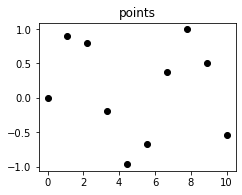

In [5]:
#Interpolate.py
from scipy import interpolate
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

x10 = np.linspace(0,10,10)
y10 = np.sin(x10)

plt.figure(figsize=(12,6))
ax = plt.subplot(231)                   #2行3列，在位置1创建子图
ax.scatter(x10,y10,c='black')           #画散点图
ax.set_title("points")

假设在某项科学试验中，我们测试并记录了上述10个试验点。现在要从这10个试验推测y和x之间的函数关系，并以此为依据，计算其它x所对应的 y值。这个过程就是所谓的“插值”。一眼望去，这些点是散乱没有规律的，难以推断背后的函数关系。在一元函数关系中，该插值可以通过interp1d类型来完成。注意**interp1d是一个类型，不是函数**。interp1d()是这个类的构造函数的调用形式。

type of f: <class 'scipy.interpolate.interpolate.interp1d'>
type of f: <class 'scipy.interpolate.interpolate.interp1d'>
type of f: <class 'scipy.interpolate.interpolate.interp1d'>
type of f: <class 'scipy.interpolate.interpolate.interp1d'>


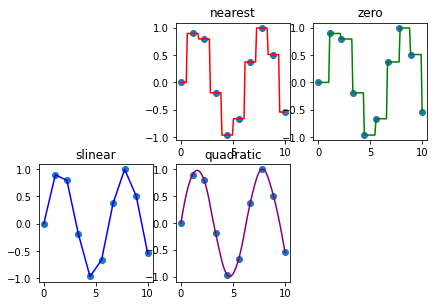

In [6]:
#Interpolate.py
x100 = np.linspace(0,10,100)    #[0,10]的包含100个元素的等差数列
colors = ['red','green','blue','purple']
for i,kind in enumerate(['nearest','zero','slinear','quadratic']):
    f = interpolate.interp1d(x10,y10,kind=kind) #从10个实验数据点插值
    print("type of f:",type(f))
    y100 = f(x100)  #应用插值结果计算100个数的“函数”值
    ax = plt.subplot(232+i) #2行3列，2+i位置建子图
    ax.scatter(x10,y10)
    ax.plot(x100,y100,c=colors[i])  #画100点的折线图以反应“函数”关系
    ax.set_title(kind)

plt.subplots_adjust(left=0.05,right=0.95,bottom=0.05,top=0.95,
                    wspace=0.2,hspace=0.2)  #调整子图间距等

interpolate.interp1d类型的构造函数接受(x,y,kind)等参数。其中，x,y提供了实验数据点，**kind则指明了插值类型**。该构造函数返回一个对象f，这个对象f内部包括了插值后的“函数关系”。f对象是callable-可调用的，也就是说它也是一个函数。f(x100)将[0,10]的包含100个数的等差数列交给f“函数”进行计算，得y100，y100中的数值就是插值推测的结果。

除了最基本的一维插值，还有样条插值很常用。样条插值是使用一种名为样条的特殊分段多项式进行插值的形式。由于样条插值可以**使用低阶多项式样条实现较小的插值误差**，这样就避免了使用高阶多项式所出现的龙格现象，所以样条插值得到了流行。

为了通过数据点画出平滑的曲线，绘图员曾经使用薄的柔性木条，硬橡胶，金属或塑料（称为机械样条）。 为了使用机械花键，在设计中沿着曲线明确选择了一些销钉，然后将花键弯曲，以便它们接触到每个销钉。
显然，在这种结构下，样条曲线在这些引脚上插入曲线。 它可以用来在其他图纸中重现曲线。 引脚所在的点称为结。 可以通过调整结点的位置来改变样条线所定义的曲线的形状。

一维spline的处理过程分为两个基本步骤：计算曲线的spline表示，对目标点进行评估。scipy有两种方式来计算曲线的spline表示和平滑系数：直接方式和参数化方式。

直接方式使用**splrep()函数**从2维平面中查找曲线的spline表示，x和y是曲线在二维坐标系中的坐标。

splrep()函数的作用是对于给定数据点集（x [i]，y [i]），确定在间隔xb <= x <= xe上平滑度为k的近似值。

该函数输出的结果是一个三元组tck，这个三元组就是曲线的spline表示，用于表示曲线的节点向量、系数和spline序号，默认的spline orde是cubic，这可以通过k参数来修改。一旦确定了曲线的spline表示，就可以使用splev()函数对x进行评估.

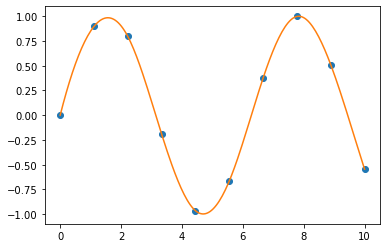

In [7]:
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep
x = np.linspace(0, 10, 10)
y = np.sin(x)
spl = splrep(x, y)
x2 = np.linspace(0, 10, 200)
y2 = splev(x2, spl)
plt.plot(x, y, 'o', x2, y2)

参数化方式对于在N维空间中的区间，使用函数splprep()来定义曲线的参数,默认输出包含两个对象：第一个对象是一个三元祖(t,c,k)，分别表示曲线的节点向量、系数和spline序号；第二个对象是一个参数变量u。对于函数splprep() 返回的spline表示，使用splev()函数来评估

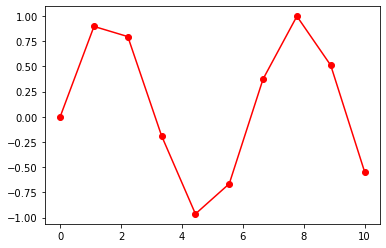

In [8]:
from scipy.interpolate import splprep, splev
tck, u = splprep([x, y], s=0)
new_points = splev(u, tck)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, y, 'ro')
ax.plot(new_points[0], new_points[1], 'r-')

interp1d的插值曲线要求经过所有实验数据点，并且，不能进行外推：即计算实验数据点范围之外的函数值。UnivariateSpline类的插值比interp1d更高级，允许外推和拟合（曲线不经过实验数据点）。

一维样条线是UnivariateSpline类的对象，并使用曲线的x和y作为构造函数的参数。该类定义__call__，因此允许使用x轴值调用对象，在该轴上评估样条线，并返回插值的y值。

通过提供平滑参数s的非零值，UnivariateSpline类也可以用于平滑数据，其含义与splrep函数的s关键字相同。这样就产生了结节数少于数据点的数目，因此不再严格地是一个插补样条，而是一个平滑的样条。如果不希望这样做，则可以使用InterpolatedUnivariateSpline类。它是UnivariateSpline始终贯穿所有点的子类（等同于将平滑参数强制为0）。

该LSQUnivariateSpline班是其他子类UnivariateSpline。它允许用户使用参数t显式指定内部结的数量和位置。这允许创建具有非线性间距的自定义样条曲线，以便在某些域中进行插值，而在其他域中进行平滑处理，或者更改样条线的特性。

在没有噪声的标准正弦数据点上进行插值和外推如下图所示

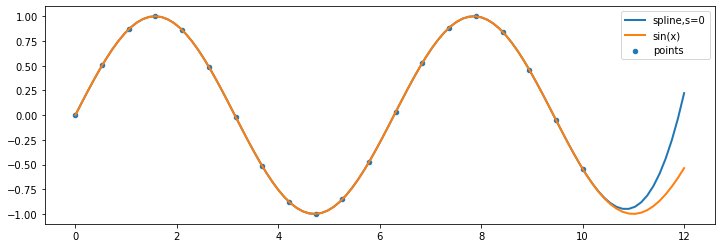

In [9]:
#UnivariateSpline.py
import numpy as np
from scipy import interpolate
from matplotlib import pyplot as plt

plt.figure(figsize=(12,4))
x = np.linspace(0,10,20)    #[0,10]含20个值的等差数列
y = np.sin(x)               #y = x的正弦
plt.scatter(x,y,s=20,label="points")   #画散点图
xs = np.linspace(0,12,100)             #[0,12]含100个值的等差数列，12>10,外推
ys = interpolate.UnivariateSpline(x,y,s=0)(xs)  #由(x,y)插值，函数应用于xs
plt.plot(xs,ys,lw=2,label="spline,s=0")   #画(xs,ys)，ys由插值函数计算而来
plt.plot(xs,np.sin(xs),lw=2,label="sin(x)") #画标准正弦函数(xs,np.sin(xs))
plt.legend()    #显示图示
plt.show()

ys = interpolate.UnivariateSpline(x,y,s=0)(xs)。类似于interp1d，UnivariateSpline也是一个类型，其构造函数接受(x,y)作为实验数据点，返回一个插值对象。这个对象类型为UnivariateSpline，同时也是一个可调用对象-函数。为帮助理解，这行代码可以拆成两行：

```Python
f = interpolate.UnivariateSpline(x,y,s=0)
ys = f(xs)
```

试验数据点中x的值域为[0,10]，而xs的值域为[0,12]，超出了原有范围。

构造函数的完整调用形式为： UnivariateSpline(x, y, w=None, bbox=[None, None], k=3, s=None, ext=0, check_finite=False) , w可以为每个数据指定权重；k默认为3，指定样条曲线的阶；s则是平滑系数

当s>0时，样条曲线-spl不一定通过实验数据点，可视为曲线拟合。当**s=0，样条曲线必须通过实验数据点**。在本例中，s=0，我们看到所有的实验数据点都在样条曲线"spline,s=0"上。

在实践当中，误差永远存在，可以认为实验数据点永远都包括噪声。接下来，我们给实验数据点加入一些噪声，再试图进行插值拟合。

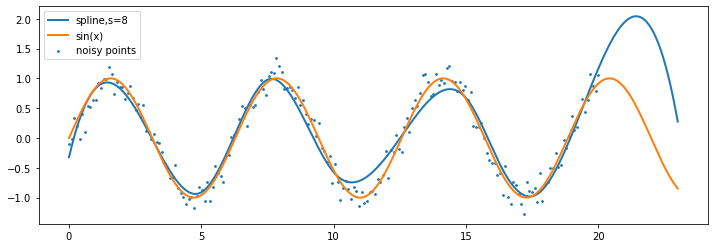

In [10]:
#UnivariateSpline2.py
import numpy as np
from scipy import interpolate
from matplotlib import pyplot as plt

plt.figure(figsize=(12,4))
x = np.linspace(0,20,200)   #[0,20]等差数列，200个值
y = np.sin(x) + np.random.standard_normal(len(x))*0.16 #带噪声正弦
plt.scatter(x,y,s=3,label="noisy points")   #散点图：噪声实验数据点
xs = np.linspace(0,23,2000) #[0,23]等差数列，2000个值
ys = interpolate.UnivariateSpline(x,y,s=8)(xs) #由(x,y)插值，函数应用于xs
plt.plot(xs,ys,lw=2,label="spline,s=8") #画(xs,ys)，ys由插值函数计算而来
plt.plot(xs,np.sin(xs),lw=2,label="sin(x)") #画标准正弦函数(xs,np.sin(xs))
plt.legend()
plt.show()

指定平滑参数s=8，这将允许样条曲线不经过实验数据点。可以看到，由于噪声的存在，即便在试验数据点的值域[0,20]范围内，插值函数未能与标准正弦曲线完全重合。在外推的值域部分，即[20,23]，则差得更多。

## 排列组合

调用 scipy 计算排列组合的具体数值很方便

In [11]:
from scipy.special import comb, perm
perm(3, 2)

6.0

In [12]:
comb(3, 2)

3.0

如果是想要列出具体的排列组合项可以调用 itertools:

In [13]:
from itertools import combinations, permutations
permutations([1, 2, 3], 2)

In [14]:
list(permutations([1, 2, 3], 2))

[(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2)]

In [15]:
list(combinations([1, 2, 3], 2))

[(1, 2), (1, 3), (2, 3)]

字符串项也是可以轻松实现的

In [16]:
list(combinations(["a", "b", 2], 2))

[('a', 'b'), ('a', 2), ('b', 2)]

各种数据类型之间也可以组合

In [17]:
list(combinations([{"a":2}, "b", 2], 2))

[({'a': 2}, 'b'), ({'a': 2}, 2), ('b', 2)]

## 简单统计

比如histogram。

In [18]:
from scipy import stats

计算histogram function的函数是scipy.stats.relfreq(a, numbins=10, defaultreallimits=None, weights=None)，计算的是 relative frequency histogram.

relative frequency histogram 就是每个 bin 中数的个数相对于总数个数的比例。

In [19]:
import numpy as np
a = np.array([2, 4, 1, 2, 3, 2])
res = stats.relfreq(a, numbins=4)
res

RelfreqResult(frequency=array([0.16666667, 0.5       , 0.16666667, 0.16666667]), lowerlimit=0.5, binsize=1.0, extrapoints=0)

可以看到，数据是按照下限0.5，然后每个bin加1来统计的

In [20]:
res.frequency

array([0.16666667, 0.5       , 0.16666667, 0.16666667])

也可以自己设置区间

In [21]:
res = stats.relfreq(a, numbins=4, defaultreallimits=(0,6))
res

RelfreqResult(frequency=array([0.16666667, 0.5       , 0.33333333, 0.        ]), lowerlimit=0, binsize=1.5, extrapoints=0)

当设置的区间小于数的范围时，会自动插值：

In [22]:
res = stats.relfreq(a, numbins=4, defaultreallimits=(2,3))
res

RelfreqResult(frequency=array([0.5       , 0.        , 0.        , 0.16666667]), lowerlimit=2, binsize=0.25, extrapoints=2)

In [23]:
freq = stats.relfreq(a, numbins=4, defaultreallimits=(2,3)).frequency
freq

array([0.5       , 0.        , 0.        , 0.16666667])

另外计算数据的histogram的还有binned_statistic函数。 一个 histogram 将空间分为几个 bins，然后给出每个bin中点的计数。scipy中该函数能够计算每个bin内的数之和，均值，中位数或者其他统计值。

该函数的参数 scipy.stats.binned_statistic(x, values, statistic='mean', bins=10, range=None) 中，x表示要被binned的值，values表示 统计计算针对的对象. 它必须是和x相同shape的

In [24]:
values = [1.0, 1.0, 2.0, 1.5, 3.0]
stats.binned_statistic([1, 1, 2, 5, 7], values, 'sum', bins=2)

BinnedStatisticResult(statistic=array([4. , 4.5]), bin_edges=array([1., 4., 7.]), binnumber=array([1, 1, 1, 2, 2], dtype=int64))